<a href="https://colab.research.google.com/github/SpandanaKalakonda/Building_ML_Pipelines/blob/main/Spliting_the_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install tfx --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 30.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.0/147.0 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.7/135.7 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 66.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 77.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.6/206.6 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
!git clone https://github.com/Building-ML-Pipelines/building-machine-learning-pipelines.git

Cloning into 'building-machine-learning-pipelines'...
remote: Enumerating objects: 801, done.
remote: Counting objects: 100% (130/130), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 801 (delta 104), reused 92 (delta 92), pack-reused 671
Receiving objects: 100% (801/801), 29.35 MiB | 17.13 MiB/s, done.
Resolving deltas: 100% (433/433), done.


In [3]:
%cd building-machine-learning-pipelines/
!python3 utils/download_dataset.py
%cd ..

/content/building-machine-learning-pipelines
INFO:root:Started download script
INFO:root:Data folder created.
INFO:urllib3.poolmanager:Redirecting http://bit.ly/building-ml-pipelines-dataset -> https://drive.google.com/uc?export=download&id=1VHjb8L8n2d6eLz_lA-F-bk6Z0UecHpEF
INFO:urllib3.poolmanager:Redirecting https://drive.google.com/uc?export=download&id=1VHjb8L8n2d6eLz_lA-F-bk6Z0UecHpEF -> https://doc-0o-8s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/fu1cqmj5k4t38050e0e06vflce1d7m67/1699395150000/06616860426990197454/*/1VHjb8L8n2d6eLz_lA-F-bk6Z0UecHpEF?e=download&uuid=e7883b8c-398d-46bc-9a68-81028c566f82
INFO:root:Download completed.
INFO:root:Finished download script
/content


In [10]:
import os
from tfx.orchestration.experimental.interactive.interactive_context import InteractiveContext
from tfx.components import CsvExampleGen
from tfx.proto import example_gen_pb2

In [12]:
# create the interactive context object
context = InteractiveContext()

## CASE 1: Spliting one dataset into subsets using a output configuration settings


In [7]:
output = example_gen_pb2.Output(
    split_config=example_gen_pb2.SplitConfig(
        # Defining the preferred number of splits
        splits=[
            # Specifying the preferred slit ratios
            example_gen_pb2.SplitConfig.Split(name='train', hash_buckets=6),
            example_gen_pb2.SplitConfig.Split(name='eval', hash_buckets=2),
            example_gen_pb2.SplitConfig.Split(name='test', hash_buckets=2)
        ]
    )
)

In [8]:
#specify the path to the input csv file folder
input_data_path="/content/building-machine-learning-pipelines/data"

In [11]:
# specify the input file path and the output configuration
example_gen = CsvExampleGen(input_base=input_data_path, output_config=output)

In [13]:
# execute the component interactively
context.run(example_gen)

ExecutionResult(
    component_id: CsvExampleGen
    execution_id: 1
    outputs:
        examples: OutputChannel(artifact_type=Examples, producer_component_id=CsvExampleGen, output_key=examples, additional_properties={}, additional_custom_properties={}, _input_trigger=None)

In [14]:
# Printing the artifacts
for artifact in example_gen.outputs['examples'].get():
  print(artifact)

Artifact(artifact: id: 1
type_id: 14
uri: "/tmp/tfx-interactive-2023-11-07T22_24_01.768594-a_k1ymnb/CsvExampleGen/examples/1"
properties {
  key: "split_names"
  value {
    string_value: "[\"train\", \"eval\", \"test\"]"
  }
}
custom_properties {
  key: "file_format"
  value {
    string_value: "tfrecords_gzip"
  }
}
custom_properties {
  key: "input_fingerprint"
  value {
    string_value: "split:single_split,num_files:1,total_bytes:78956236,xor_checksum:1699395222,sum_checksum:1699395222"
  }
}
custom_properties {
  key: "payload_format"
  value {
    string_value: "FORMAT_TF_EXAMPLE"
  }
}
custom_properties {
  key: "span"
  value {
    int_value: 0
  }
}
custom_properties {
  key: "tfx_version"
  value {
    string_value: "1.14.0"
  }
}
state: LIVE
, artifact_type: id: 14
name: "Examples"
properties {
  key: "span"
  value: INT
}
properties {
  key: "split_names"
  value: STRING
}
properties {
  key: "version"
  value: INT
}
base_type: DATASET
)


### **CASE 2: Preserving the existing input split by defining the input configuration**
example folder structure:

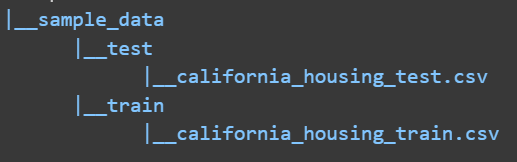

In [20]:
# Specifying the input data folder path
input_data = "/content/sample_data"

# Specifying the input configuration
input = example_gen_pb2.Input(
    splits=[
        # set the existing sub directories
        example_gen_pb2.Input.Split(name='train', pattern='train/*'),
        example_gen_pb2.Input.Split(name='test', pattern='test/*')
    ]
)

In [22]:
# adding the input_config argument
example_gen = CsvExampleGen(input_base=input_data, input_config=input)

In [23]:
# run the context inteactively
context.run(example_gen)

ExecutionResult(
    component_id: CsvExampleGen
    execution_id: 2
    outputs:
        examples: OutputChannel(artifact_type=Examples, producer_component_id=CsvExampleGen, output_key=examples, additional_properties={}, additional_custom_properties={}, _input_trigger=None)